In [35]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time
from collections import Counter
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [30]:
#(빈)크롬창 열기
driver = webdriver.Chrome(ChromeDriverManager().install())

#네이버 지식인: 블핑 지수
driver.get("https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%EB%A0%88%EB%93%9C%EB%B2%A8%EB%B2%B3+%EC%A1%B0%EC%9D%B4+%EC%82%AC%EC%A7%84")
driver.maximize_window()
time.sleep(3)

#옵션 클릭
#opt = driver.find_element_by_css_selector('#snb > div.api_group_option_filter._search_option_simple_wrap > div > div.option_filter > a')
#opt.click()
#time.sleep(1)

#6개월 클릭
#month = driver.find_element_by_css_selector('#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a:nth-child(7)')
#month.click()

all_contents_list=[]
while True:
    try:
        for i in range(1, 11):
            list = driver.find_element_by_css_selector(f"#main_pack > section.sc_new.sp_nkin._au_kin_collection > div > ul > li:nth-child({i}) > div > div.question_area > div.question_group > a")
            list.click()
            #time.sleep(1)
            
            driver.switch_to.window(driver.window_handles[1])
            #time.sleep(1)
                                                               
            #제목이랑 내용 함께 추출하고 싶을 때                                   
            all_contents=driver.find_elements_by_css_selector('#content > div.question-content > div')
            for j in all_contents:                              
                all_contents_list.append(j.text)
            #time.sleep(1)
            
            driver.close()
            #time.sleep(1)
            driver.switch_to.window(driver.window_handles[0])

                                                    
        next = driver.find_element_by_css_selector("#main_pack > div.api_sc_page_wrap > div > a.btn_next")
        next.click()

    except:
        break

In [37]:
#형태소 분석기를 통해 텍스트 정제하기
from konlpy.tag import Okt
okt=Okt()
import re

In [ ]:
#필요없는 표시들 지우기
result_list =[]
for i in all_contents_list:
    result = i.replace("\n", "")
    result = result.replace('질문', '')
    result = result.replace('?', '')
    result = result.replace('나눈', '')
    result = result.replace('내공', '')
    result = result.replace('[', '')
    result = result.replace(']', '')
    result = result.replace('^', '')
    result = re.sub('ㅠ|ㅜ|ㅎ|ㅋ|ㅇ|!|~', '', result)
    
    #정규표현식
    result = re.compile("태그\s디렉터리.+").sub("", result)
    result = re.compile("[a-zA-Z]").sub("", result)
    result_list.append(result)

result_list

In [ ]:
data = {'레드벨벳_조이' : result_list}
df= pd.DataFrame(data)
df

In [ ]:
df.to_csv('레드벨벳_조이.csv', encoding='utf-8-sig')

In [31]:
df = pd.read_csv('레드벨벳_조이.csv', encoding='utf-8-sig')

In [32]:
result_list = df['레드벨벳_조이']

In [33]:
str = ''.join(result_list)
type(result_list), type(str)

(pandas.core.series.Series, str)

In [38]:
#불용어 지우기
stopwords=[]

#명사
def extract_tag(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Noun']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

#데이터타입 변경해준 result_list를 함수에 대입
text_data = extract_tag(str)

#빈도수 세기
count_n = Counter(text_data)

#빈출 단어 뽑기
count_n.most_common(20)

[('사진', 835),
 ('조이', 679),
 ('레드', 668),
 ('벨벳', 667),
 ('좀', 243),
 ('고화질', 133),
 ('예리', 65),
 ('때', 62),
 ('아이린', 51),
 ('원본', 50),
 ('배경화면', 45),
 ('이', 44),
 ('보정', 41),
 ('움짤', 32),
 ('채택', 31),
 ('주시', 30),
 ('제', 28),
 ('분', 28),
 ('장', 27),
 ('웬디', 27)]

In [39]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

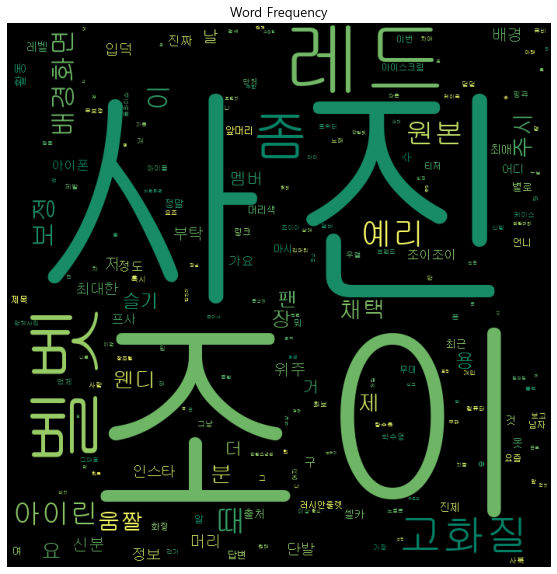

In [40]:
#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                      colormap = 'summer', random_state =1).generate_from_frequencies(count_n)

#빈출단어 시각화
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show

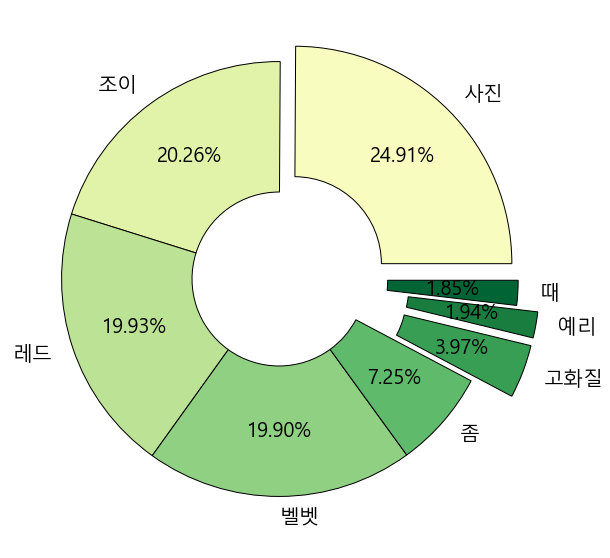

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n=count_n.most_common(8)
n

df = pd.DataFrame(n, columns=['명사', '빈도수'])
wedgeprops={'width' : 0.6, 'edgecolor' : 'black', 'linewidth' : 1}
plt.figure(figsize=(10, 10))
colors=sns.color_palette('YlGn', len(df['명사']))
plt.pie(df['빈도수'], labels = df['명사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)

plt.show()

In [42]:
#불용어 지우기
stopwords=['있다', '하다', '되다', '돼다', '싶다', '보다', '해주다', '들다', '자다', '끄다', '오다', '가다', '이다',
           '찍다', '그려지다', '그리다', '이르다', '읽다', '겁니다', '파다', '저러다', '데리다', '달다', '날다',
           '따르다', '추다', '적히다', '끼다', '짜다', '비다']

#동사
def extract_tag2(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Verb']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

text_data = extract_tag2(str)

#빈도수 세기
count_v = Counter(text_data)

#빈출 단어 뽑기
v=count_v.most_common(20)
v

[('줄다', 182),
 ('감사하다', 48),
 ('올려주다', 45),
 ('알다', 40),
 ('나오다', 28),
 ('드리다', 27),
 ('입다', 21),
 ('찾다', 20),
 ('사다', 19),
 ('올리다', 13),
 ('보내다', 12),
 ('걸다', 11),
 ('해드리다', 11),
 ('맞다', 11),
 ('웃다', 10),
 ('말다', 10),
 ('넘다', 9),
 ('부르다', 8),
 ('모르다', 8),
 ('빠지다', 8)]

<function matplotlib.pyplot.show(close=None, block=None)>

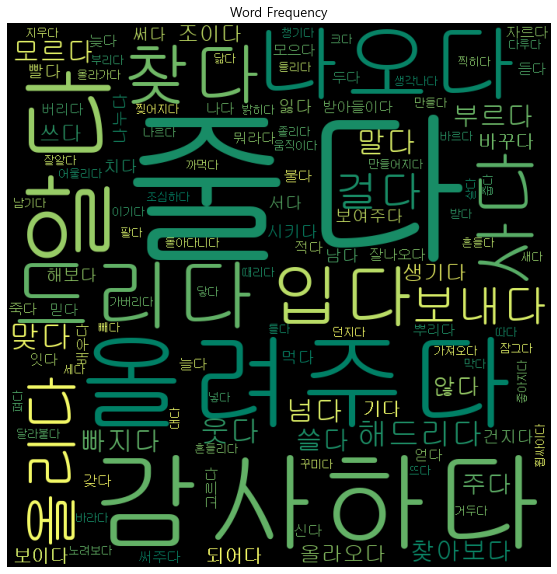

In [43]:
#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                     colormap = 'summer', random_state =1).generate_from_frequencies(count_v)

#빈출단어 시각화
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show

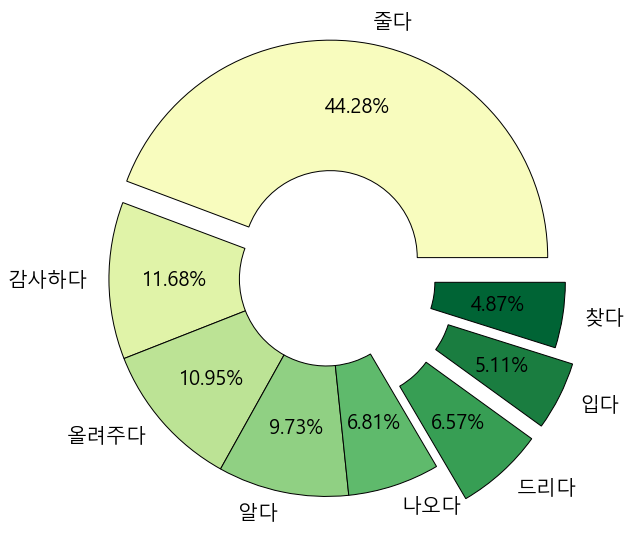

<Figure size 432x288 with 0 Axes>

In [44]:
v=count_v.most_common(8)

df = pd.DataFrame(v, columns=['동사', '빈도수'])

colors=sns.color_palette('YlGn', len(df['동사']))

plt.figure(figsize=(10, 10))

plt.pie(df['빈도수'], labels = df['동사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)


plt.show()
plt.savefig('verb_pie.png')